In [22]:
import os
import glob
import numpy as np
from astropy.table import Table, vstack
from astropy.time import Time
from ccdproc import ImageFileCollection
from tqdm import tqdm
from astropy import units as u
from astropy.coordinates import SkyCoord

In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams["savefig.dpi"] = 500
mpl.rcParams["xtick.labelsize"] = 14  # X축 틱의 글자 크기 설정
mpl.rcParams["ytick.labelsize"] = 14  # Y축 틱의 글자 크기 설정
plt.rc("font", family="serif")

In [43]:
from astropy.time import Time
import re

def extract_date_obs_astropy(filenames):
    date_obs_list = []
    for filename in filenames:
        # 정규표현식으로 날짜와 시간을 추출 (YYYYMMDD_HHMMSS 형식)
        match = re.search(r'(\d{8}_\d{6})', filename)
        if match:
            date_str = match.group(1)  # 예: 20231017_052511
            # astropy Time 객체로 변환 (포맷: YYYYMMDD_HHMMSS)
            date_obs = Time(date_str, format='yyyyMMdd_HHmmss', scale='utc')
            date_obs_list.append(date_obs)
        else:
            # 매칭 실패 시 None 추가
            date_obs_list.append(None)
    return date_obs_list

In [24]:
path_data = '/large_data/Commission/SDSSJ0228-0901/cor_phot'
path_save = '/large_data/Commission/SDSSJ0228-0901'

In [25]:
c_target = SkyCoord('2:28:49.5', '-09:01:53.8', unit=(u.hourangle, u.deg))

In [ ]:
filte = 'm650'
catalogs = sorted(glob.glob(f"{path_data}/calib*{filte}*phot.cat"))
print(f"{len(catalogs)} found")
print(catalogs)

5 found
['/large_data/Commission/SDSSJ0228-0901/cor_phot/calib_7DT_SDSSJ0228-0901_20231017_052511_m650_540.com.phot.cat', '/large_data/Commission/SDSSJ0228-0901/cor_phot/calib_7DT_SDSSJ0228-0901_20231018_055329_m650_600.com.phot.cat', '/large_data/Commission/SDSSJ0228-0901/cor_phot/calib_7DT_SDSSJ0228-0901_20231019_050333_m650_600.com.phot.cat', '/large_data/Commission/SDSSJ0228-0901/cor_phot/calib_7DT_SDSSJ0228-0901_20231026_080608_m650_3600.com.phot.cat', '/large_data/Commission/SDSSJ0228-0901/cor_phot/calib_7DT_SDSSJ0228-0901_20231115_045036_m650_1200.com.phot.cat']


In [54]:
catalogs_m675 = sorted(glob.glob(f"{path_data}/calib*m675*phot.cat"))
print(f"{len(catalogs_m675)} found")
print(catalogs_m675)

5 found
['/large_data/Commission/SDSSJ0228-0901/cor_phot/calib_7DT_SDSSJ0228-0901_20231017_053651_m675_600.com.phot.cat', '/large_data/Commission/SDSSJ0228-0901/cor_phot/calib_7DT_SDSSJ0228-0901_20231018_060614_m675_600.com.phot.cat', '/large_data/Commission/SDSSJ0228-0901/cor_phot/calib_7DT_SDSSJ0228-0901_20231019_051541_m675_600.com.phot.cat', '/large_data/Commission/SDSSJ0228-0901/cor_phot/calib_7DT_SDSSJ0228-0901_20231026_080601_m675_3600.com.phot.cat', '/large_data/Commission/SDSSJ0228-0901/cor_phot/calib_7DT_SDSSJ0228-0901_20231115_051301_m675_1200.com.phot.cat']


In [27]:
tables = []

for incat in catalogs:
	intbl = Table.read(incat, format='ascii')
	c_cat = SkyCoord(intbl['ALPHA_J2000'], intbl['DELTA_J2000'], unit='deg')
	indx, sep, _ = c_target.match_to_catalog_sky(c_cat)
	tables.append(intbl[indx])

In [28]:
comtbl = vstack(tables)

In [57]:
tables = []

for incat in catalogs_m675:
	intbl = Table.read(incat, format='ascii')
	c_cat = SkyCoord(intbl['ALPHA_J2000'], intbl['DELTA_J2000'], unit='deg')
	indx, sep, _ = c_target.match_to_catalog_sky(c_cat)
	tables.append(intbl[indx])

comtbl_m675 = vstack(tables)

In [59]:

comtbl['m650-m675'] = comtbl['MAG_AUTO_m650'] - comtbl_m675['MAG_AUTO_m675']

In [60]:
times = Time(['2023-10-17T05:25:11', '2023-10-18T05:53:29', '2023-10-19T05:03:33', '2023-10-26T08:06:08', '2023-11-15T04:50:36'], format='isot')

Text(0, 0.5, 'MAG_AUTO_m650 [mag]')

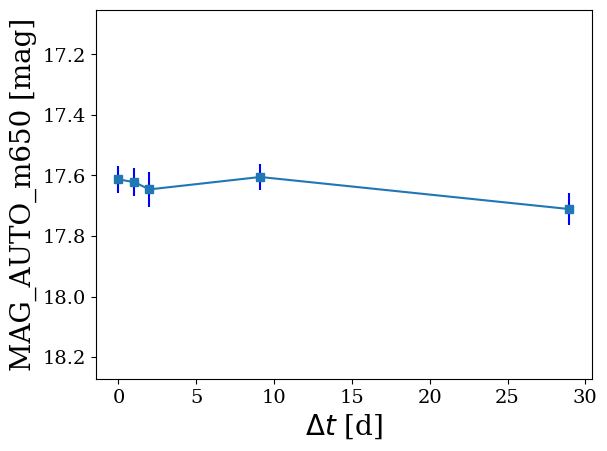

In [53]:
plt.plot(times.mjd-times.mjd.min(), comtbl['MAG_AUTO_m650'], 's-')
plt.errorbar(times.mjd-times.mjd.min(), comtbl['MAG_AUTO_m650'], yerr=comtbl['MAGERR_AUTO_m650'], ls='none', zorder=0, color='b')
yl, yu = plt.ylim()
plt.ylim(yu+0.5, yl-0.5)

plt.xlabel(r'$\Delta t$ [d]')
plt.ylabel(f"MAG_AUTO_{filte} [mag]")

Text(0, 0.5, 'm650-m675 [mag]')

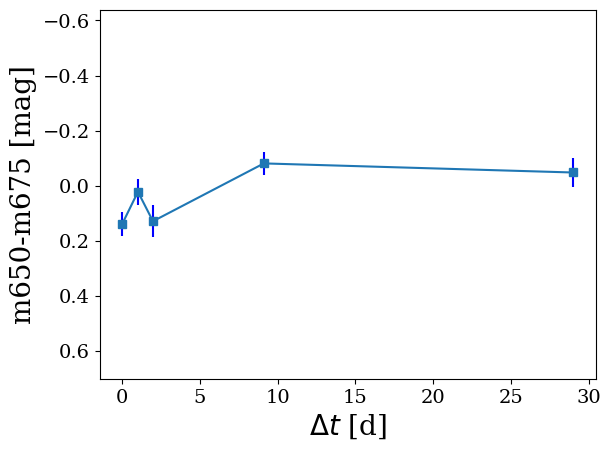

In [62]:
plt.plot(times.mjd-times.mjd.min(), comtbl['m650-m675'], 's-')
plt.errorbar(times.mjd-times.mjd.min(), comtbl['m650-m675'], yerr=comtbl['MAGERR_AUTO_m650'], ls='none', zorder=0, color='b')
yl, yu = plt.ylim()
plt.ylim(yu+0.5, yl-0.5)

plt.xlabel(r'$\Delta t$ [d]')
plt.ylabel(f"m650-m675 [mag]")